# Fattening Factor of 3.16

In [1]:
%pylab inline
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_2/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object


In [3]:
def plot_dens(i,velocity=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
#     slc.set_zlim(physical_quantity, 5.0e-20,1.0e-16)
    slc.show()
def plot_all(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
#     slc.set_log("all", False)
#     slc.set_zlim(physical_quantity, 5.0e-20,1.0e-16)
#     slc.set_zlim(physical_quantity, 5.5e-22,1.1e-19)
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_zlim(physical_quantity,58,60)
#     slc.set_log("all", False)
    slc.show()


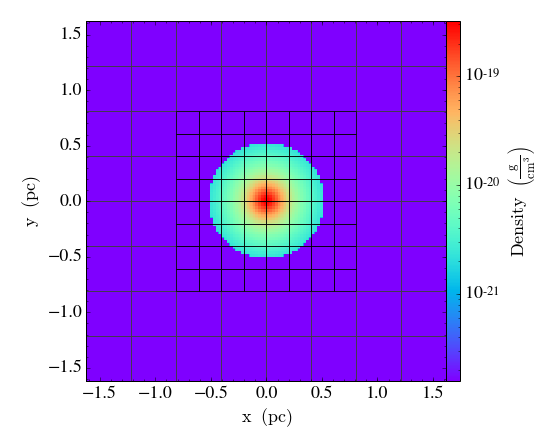


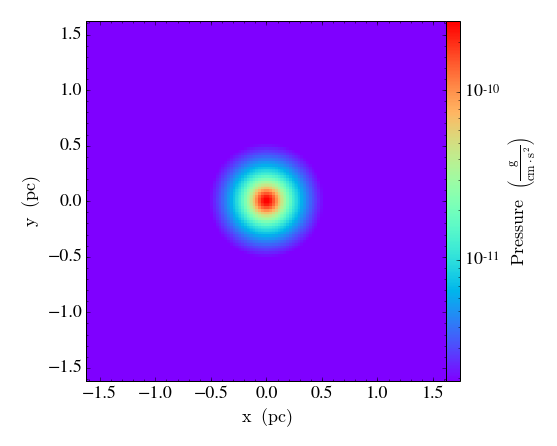


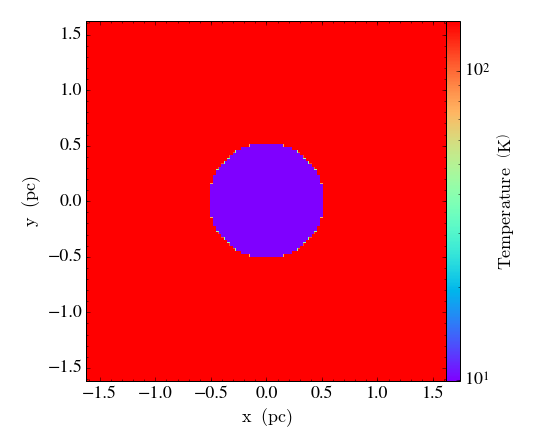

In [4]:
plot_all(0)

(1e+17, 5e+18)

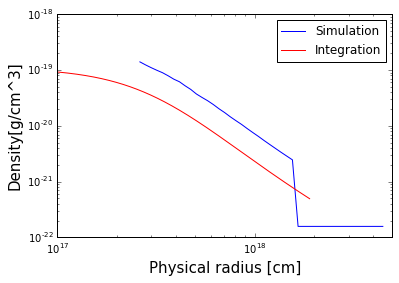

In [5]:
from scipy import integrate
from matplotlib.legend_handler import HandlerLine2D
from mpl_toolkits.axes_grid1 import AxesGrid
i =0
rho_c = 1.1E-19
# pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
plt.figure()
sp = pf.sphere(pf.domain_center, (1.5,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.loglog(rp.x.value,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 20.0
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.loglog(r,rho*rho_c,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [cm]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)
plt.xlim(1e17,5e18)

In [6]:
# plt.subplot(211)
def density_radial_profile(timestep):
    ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
    c = ds.find_max("density")[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['x'])
    plt.loglog(np.array(ray['x'][srt]), np.array(ray['density'][srt]),label="i={}".format(timestep))
#     plt.title("Timestep {}".format(timestep),fontsize=13)
    plt.xlabel("log Radius",fontsize=13)
    plt.ylabel('log Density',fontsize=13)

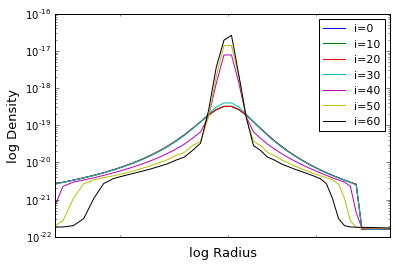

In [8]:
plt.figure()
for i in np.arange(62):
    if i%10 ==0 : 
        density_radial_profile(i)
plt.xlim(3.5e18,7e18)
plt.legend(loc='upper right',prop={'size':11},numpoints=1)

Zooming in a bit

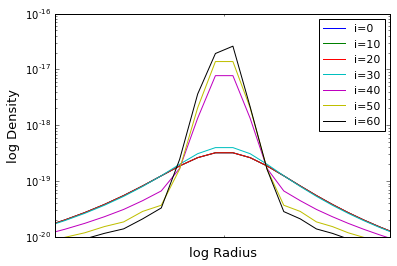

In [11]:
plt.figure()
for i in np.arange(62):
    if i%10 ==0 : 
        density_radial_profile(i)
plt.xlim(4.3e18,5.8e18)
plt.ylim(1e-20,1e-16)
plt.legend(loc='upper right',prop={'size':11},numpoints=1)


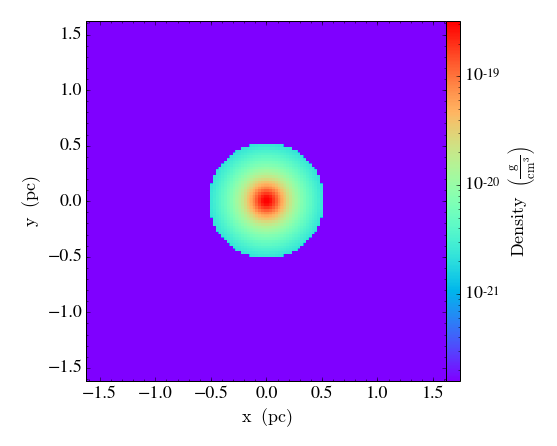


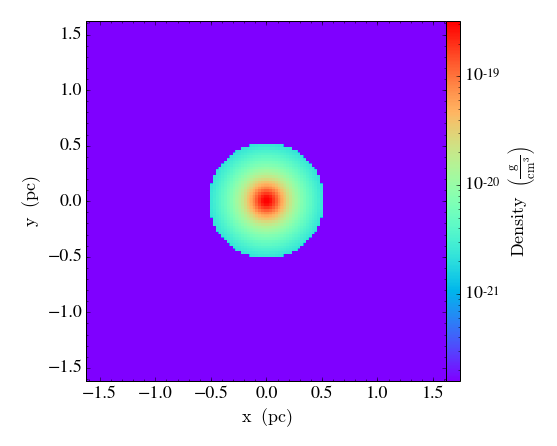


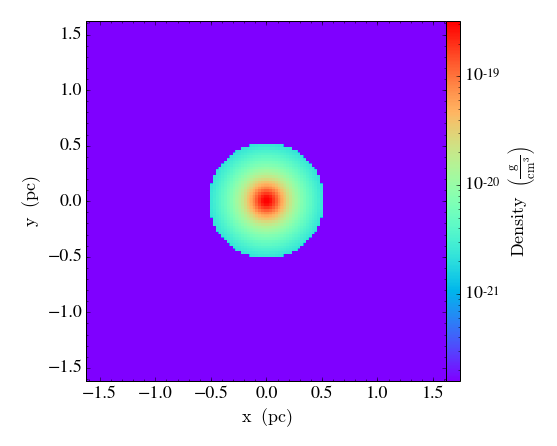


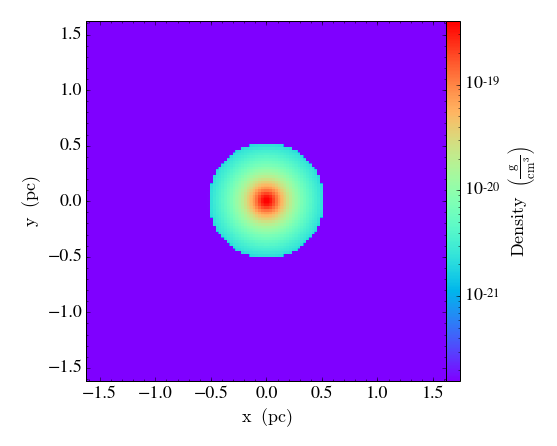


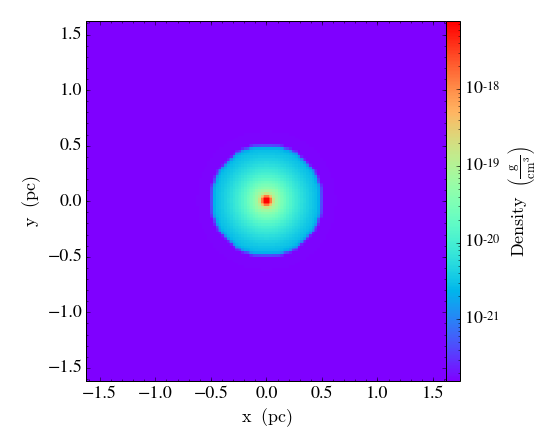


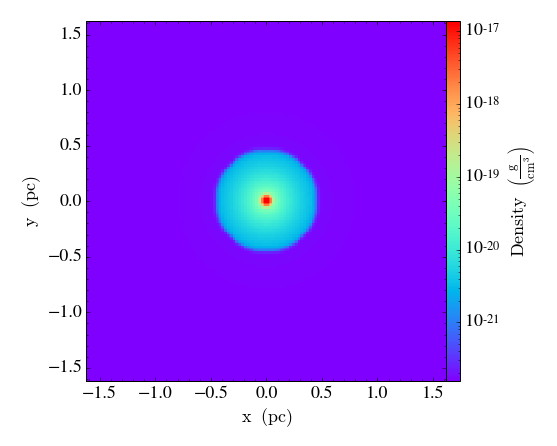


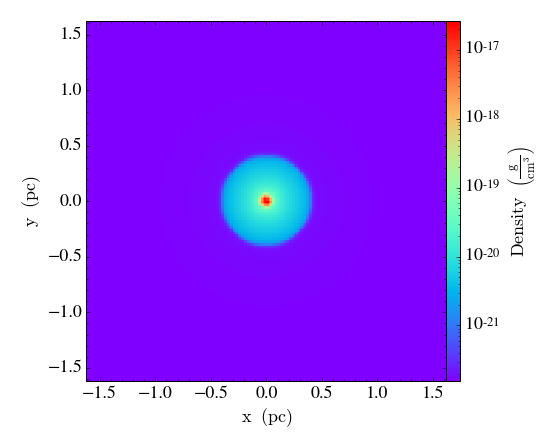

In [10]:
for i in np.arange(62):
    if i%10 ==0 : 
        plot_dens(i)


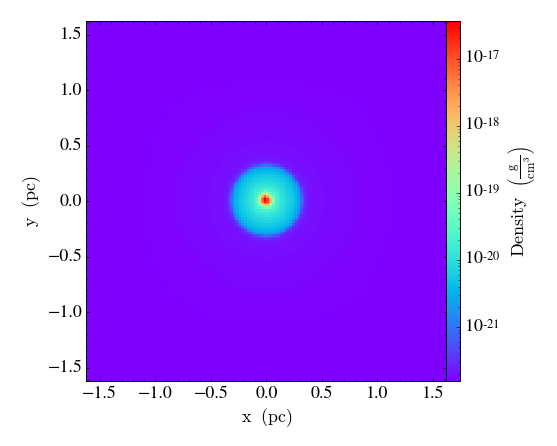

In [13]:
plot_dens(73)


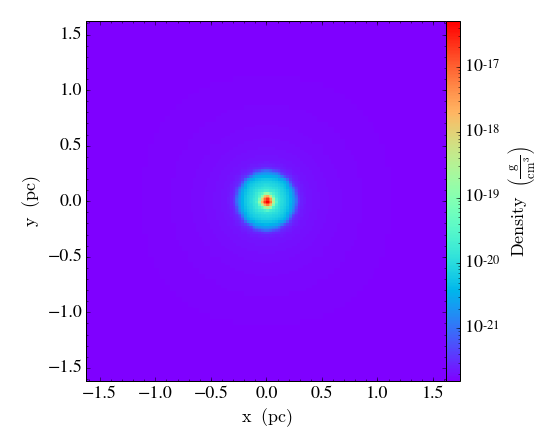

In [16]:
plot_dens(80)


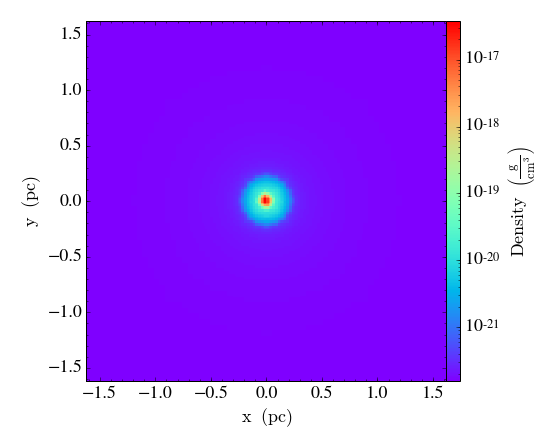

In [17]:
plot_dens(85)


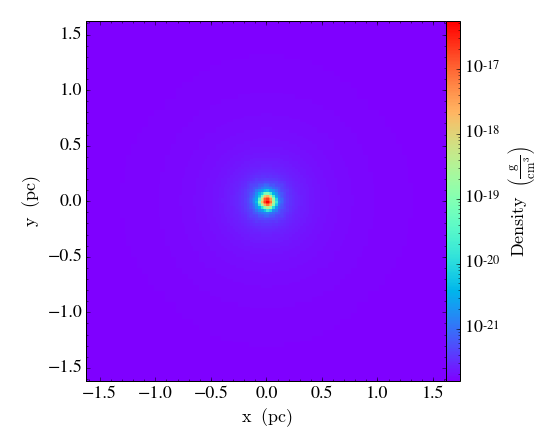

In [19]:
plot_dens(95)

In [ ]:
-rw-r-----   1 dorislee dorislee    1658 Apr 13 11:57 1843571.err
-rw-r-----   1 dorislee dorislee   14094 Apr 13 11:54 1843571.out
-rw-r-----   1 dorislee dorislee     278 Apr 13 15:38 1859293.err
-rw-r-----   1 dorislee dorislee    2222 Apr 13 15:32 1859293.out
-rw-r-----   1 dorislee dorislee    3580 Apr 13 16:09 1859446.err
-rw-r-----   1 dorislee dorislee    2410 Apr 13 16:07 1859446.out
-rw-r-----   1 dorislee dorislee    5198 Apr 13 16:42 1859568.err
-rw-r-----   1 dorislee dorislee    2658 Apr 13 16:40 1859568.out
-rw-r-----   1 dorislee dorislee    4918 Apr 13 18:03 1859892.err
-rw-r-----   1 dorislee dorislee    2410 Apr 13 18:00 1859892.out
-rw-r-----   1 dorislee dorislee   18232 Apr 13 18:57 1859986.err
-rw-r-----   1 dorislee dorislee    2410 Apr 13 18:57 1859986.out
-rw-r-----   1 dorislee dorislee    3048 Apr 13 20:58 1860141.err
-rw-r-----   1 dorislee dorislee    4478 Apr 13 20:52 1860141.out
-rw-r-----   1 dorislee dorislee     314 Apr 13 19:27 1860146.err
-rw-r-----   1 dorislee dorislee    2410 Apr 13 19:23 1860146.out

Didn't crash but pretty much reached the end here. 

The last healthy timestep was 95 at 2.6706E+13s 